# Analysis of Yelp Business Intelligence Data

Author: Tanay Mukherjee,
Date: 25th April, 2020

*A trove of reviews, businesses, users, tips, and check-in data!*

We will analyze a subset of Yelp's business, reviews and user data. This dataset comes to us from Kaggle although we have taken steps to pull this data into a publis s3 bucket: s3://yelp-dataset-tm/*.json

## 1. Installation and Initial Setup

Begin by installing the necessary libraries that you may need to conduct your analysis. At the very least, you must install pandas and matplotlib

In [1]:
%%info

### Pre-defined packages in pyspark kernel

In [2]:
sc.list_packages()

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
2,application_1588355229494_0004,pyspark,idle,,,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Package                    Version
-------------------------- -------
beautifulsoup4             4.8.1
boto                       2.49.0
jmespath                   0.9.4
lxml                       4.4.2
mysqlclient                1.4.6
nltk                       3.4.5
nose                       1.3.4
numpy                      1.14.5
pip                        20.1
py-dateutil                2.2
python36-sagemaker-pyspark 1.2.6
pytz                       2019.3
PyYAML                     3.11
setuptools                 46.1.3
six                        1.13.0
soupsieve                  1.9.5
wheel                      0.34.2
windmill                   1.6

### Installing the packages that would be needed for this exercise

In [3]:
sc.install_pypi_package("pandas==1.0.3")
sc.install_pypi_package("matplotlib==3.2.1")
sc.install_pypi_package("seaborn==0.10.0")

# sc.install_pypi_package("")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached pandas-1.0.3-cp36-cp36m-manylinux1_x86_64.whl (10.0 MB)
  Using cached python_dateutil-2.8.1-py2.py3-none-any.whl (227 kB)

  Using cached matplotlib-3.2.1-cp36-cp36m-manylinux1_x86_64.whl (12.4 MB)
  Using cached pyparsing-2.4.7-py2.py3-none-any.whl (67 kB)
  Using cached kiwisolver-1.2.0-cp36-cp36m-manylinux1_x86_64.whl (88 kB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)

  Using cached seaborn-0.10.0-py3-none-any.whl (215 kB)
  Using cached scipy-1.4.1-cp36-cp36m-manylinux1_x86_64.whl (26.1 MB)

### Verifying the packages' list once the installation is done

In [4]:
sc.list_packages()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Package                    Version
-------------------------- -------
beautifulsoup4             4.8.1
boto                       2.49.0
cycler                     0.10.0
jmespath                   0.9.4
kiwisolver                 1.2.0
lxml                       4.4.2
matplotlib                 3.2.1
mysqlclient                1.4.6
nltk                       3.4.5
nose                       1.3.4
numpy                      1.14.5
pandas                     1.0.3
pip                        20.1
py-dateutil                2.2
pyparsing                  2.4.7
python-dateutil            2.8.1
python36-sagemaker-pyspark 1.2.6
pytz                       2019.3
PyYAML                     3.11
scipy                      1.4.1
seaborn                    0.10.0
setuptools                 46.1.3
six                        1.13.0
soupsieve                  1.9.5
wheel                      0.34.2
windmill                   1.6

## Importing

Now, import the installed packages from the previous block below.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [6]:
from pyspark import SparkContext
from pyspark.sql import SQLContext

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Loading Data
We are finally ready to load data. Using spark load the data from S3 into a dataframe object that we can manipulate further down in our analysis.

In [ ]:
df_all = spark.read.json('s3://yelp-dataset-tm/*.json')

In [7]:
df = spark.read.json('s3://yelp-dataset-tm/yelp_academic_dataset_business.json')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Overview of Data
Display the number of rows and columns in our dataset.

In [8]:
print(("Columns:", len(df.columns), "Rows:", (df.count())))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

('Columns:', 14, 'Rows:', 209393)

Data type of each key/value in the dataframe

In [9]:
df.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- address: string (nullable = true)
 |-- attributes: struct (nullable = true)
 |    |-- AcceptsInsurance: string (nullable = true)
 |    |-- AgesAllowed: string (nullable = true)
 |    |-- Alcohol: string (nullable = true)
 |    |-- Ambience: string (nullable = true)
 |    |-- BYOB: string (nullable = true)
 |    |-- BYOBCorkage: string (nullable = true)
 |    |-- BestNights: string (nullable = true)
 |    |-- BikeParking: string (nullable = true)
 |    |-- BusinessAcceptsBitcoin: string (nullable = true)
 |    |-- BusinessAcceptsCreditCards: string (nullable = true)
 |    |-- BusinessParking: string (nullable = true)
 |    |-- ByAppointmentOnly: string (nullable = true)
 |    |-- Caters: string (nullable = true)
 |    |-- CoatCheck: string (nullable = true)
 |    |-- Corkage: string (nullable = true)
 |    |-- DietaryRestrictions: string (nullable = true)
 |    |-- DogsAllowed: string (nullable = true)
 |    |-- DriveThru: string (nullable = true)
 |    |-- GoodForDancing: str

### Display the first 5 rows with the following columns:

- business_id
- name
- city
- state
- categories

In [10]:
df_1 = df["business_id", "name", "city", "state", "categories"]
df_1.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+---------------+-----+--------------------+
|         business_id|                name|           city|state|          categories|
+--------------------+--------------------+---------------+-----+--------------------+
|f9NumwFMBDn751xgF...|The Range At Lake...|      Cornelius|   NC|Active Life, Gun/...|
|Yzvjg0SayhoZgCljU...|   Carlos Santo, NMD|     Scottsdale|   AZ|Health & Medical,...|
|XNoUzKckATkOD1hP6...|             Felinus|       Montreal|   QC|Pets, Pet Service...|
|6OAZjbxqM5ol29BuH...|Nevada House of Hose|North Las Vegas|   NV|Hardware Stores, ...|
|51M2Kk903DFYI6gnB...|USE MY GUY SERVIC...|           Mesa|   AZ|Home Services, Pl...|
+--------------------+--------------------+---------------+-----+--------------------+
only showing top 5 rows

## 2. Analyzing Categories

Let's now answer this question: how many unique categories are represented in this dataset?

Essentially, we have the categories per business as a list - this is useful to quickly see what each business might be represented as but it is difficult to easily answer questions such as:

- How many businesses are categorized as Active Life, for instance
- What are the top 20 most popular categories available?

In [11]:
df_2 = df["business_id","categories"]
df_2.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+
|         business_id|          categories|
+--------------------+--------------------+
|f9NumwFMBDn751xgF...|Active Life, Gun/...|
|Yzvjg0SayhoZgCljU...|Health & Medical,...|
|XNoUzKckATkOD1hP6...|Pets, Pet Service...|
|6OAZjbxqM5ol29BuH...|Hardware Stores, ...|
|51M2Kk903DFYI6gnB...|Home Services, Pl...|
+--------------------+--------------------+
only showing top 5 rows

## Association Table

We need to "break out" these categories from the business ids? One common approach to take is to build an association table mapping a single business id multiple times to each distinct category.

For instance, given the following:


| business_id | categories |
|-------------|------------|
| abcd123     | a,b,c      |

We would like to derive something like:

| business_id | category |
|-------------|------------|
| abcd123     | a          |
| abcd123     | b          |
| abcd123     | c          |


What this does is allow us to then perform a myriad of rollups and other analysis on this association table which can aid us in answering the questions asked above.

Implement the code necessary to derive the table described from your original yelp dataframe.

In [12]:
# Exploding into multiple cells

from pyspark.sql.functions import split, explode
res = df_2.select(df_2.business_id, explode(split(df_2.categories, ', ')).alias('category'))

res.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+----------------+
|         business_id|        category|
+--------------------+----------------+
|f9NumwFMBDn751xgF...|     Active Life|
|f9NumwFMBDn751xgF...|Gun/Rifle Ranges|
|f9NumwFMBDn751xgF...|     Guns & Ammo|
|f9NumwFMBDn751xgF...|        Shopping|
|Yzvjg0SayhoZgCljU...|Health & Medical|
+--------------------+----------------+
only showing top 5 rows

## Total Unique Categories

Finally, we are ready to answer the question: **what is the total number of unique categories available?**

Below, implement the code necessary to calculate this figure.

In [13]:
from pyspark.sql.functions import col, countDistinct

res.agg(*(countDistinct(col(category)).alias(category) for category in res.columns))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

DataFrame[business_id: bigint, category: bigint]

In [14]:
unique = res.select("category").distinct()
unique.select("category").count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

1336

## Top Categories By Business

Now let's find the top categories in this dataset by rolling up categories.

### Counts of Businesses / Category

So now, let's unroll our distinct count a bit and display the per count value of businesses per category.

The expected output should be:

| category | count |
|-------------|------------|
| a     | 15         |
| b     | 2          |
| c     | 45          |

Or something to that effect.

In [15]:
from pyspark.sql.functions import count

res.groupBy("category").count().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+-----+
|           category|count|
+-------------------+-----+
|     Dermatologists|  341|
|   Historical Tours|   54|
|Mobile Home Dealers|   16|
|     Paddleboarding|   36|
|   Hot Air Balloons|   21|
|      Data Recovery|  195|
|      Videographers|  169|
|      Skating Rinks|  104|
|             Fondue|   54|
|    Pet Photography|   49|
|  Pet Waste Removal|   34|
|        Boat Repair|  100|
|            Beaches|   74|
|       Contract Law|   13|
|       Aerial Tours|   28|
|  Signature Cuisine|    1|
|        Hobby Shops|  828|
|           Day Spas| 2880|
|              Reiki|  312|
|Private Jet Charter|   10|
+-------------------+-----+
only showing top 20 rows

### Bar Chart of Top Categories

With this data available, let us now build a barchart of the top 20 categories. 

**HINT**: don't forget about the matplotlib magic!

```
%matplot plt
```

In [16]:
# Pick the data for top 20 rows

from pyspark.sql.functions import split,explode

category = df.select('categories')
individual_category = category.select(explode(split('categories', ', ')).alias('category'))
grouped_category = individual_category.groupby('category').count()
top_category = grouped_category.sort('count',ascending=False)
top_category.show(20,truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------------+-----+
|category                 |count|
+-------------------------+-----+
|Restaurants              |63944|
|Shopping                 |34644|
|Food                     |32991|
|Home Services            |22487|
|Beauty & Spas            |20520|
|Health & Medical         |19227|
|Local Services           |15783|
|Automotive               |14720|
|Nightlife                |14211|
|Bars                     |12400|
|Event Planning & Services|11263|
|Active Life              |10225|
|Coffee & Tea             |8415 |
|Fashion                  |8374 |
|Fast Food                |8106 |
|Sandwiches               |8064 |
|American (Traditional)   |7596 |
|Home & Garden            |7331 |
|Hair Salons              |7303 |
|Pizza                    |7302 |
+-------------------------+-----+
only showing top 20 rows

In [17]:
from pyspark.sql.functions import split, explode, desc

top_20 = top_category.sort(desc('count')).limit(20).toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

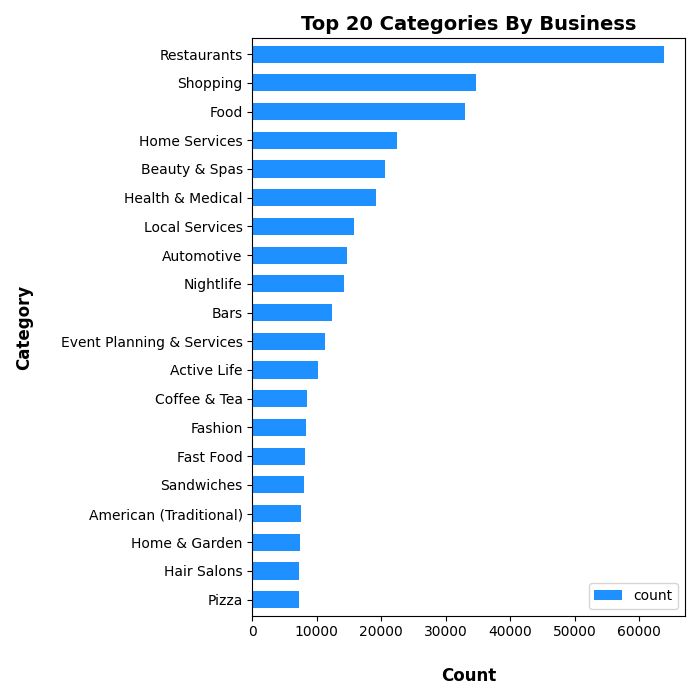

In [18]:
ax = top_20.plot(kind='barh', x='category', y='count', 
            figsize=(7, 7), color='dodgerblue', zorder=2, width=0.6)

ax.set_xlabel("Count", labelpad=20, weight='bold', size=12)
ax.set_ylabel("Category", labelpad=20, weight='bold', size=12)
ax.set_title("Top 20 Categories By Business", weight='bold', size=14)
plt.tight_layout()
plt.gca().invert_yaxis()

%matplot plt

## 3.Do Yelp Reviews Skew Negative?

Oftentimes, it is said that the only people who write a written review are those who are extremely _dissatisfied_ or extremely _satisfied_ with the service received. 

How true is this really? Let's try and answer this question.

## Loading Review Data

Begin by loading the review data set from S3 and printing schema to determine what data is available.

In [19]:
df_rev = spark.read.json('s3://yelp-dataset-tm/yelp_academic_dataset_review.json')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [20]:
df_rev.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- business_id: string (nullable = true)
 |-- cool: long (nullable = true)
 |-- date: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- review_id: string (nullable = true)
 |-- stars: double (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)

In [21]:
df_rev_1 = df_rev["business_id", "stars"]
df_rev_1.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|         business_id|stars|
+--------------------+-----+
|-MhfebM0QIsKt87iD...|  2.0|
|lbrU8StCq3yDfr-QM...|  1.0|
|HQl28KMwrEKHqhFrr...|  5.0|
|5JxlZaqCnk1MnbgRi...|  1.0|
|IS4cv902ykd8wj1TR...|  4.0|
+--------------------+-----+
only showing top 5 rows

Now, let's aggregate along the stars column to get a resultant dataframe that displays average stars per business as accumulated by users who **took the time to submit a written review.**

In [22]:
# Additional task
# Top Rating counts give by User to businesses

rating = df_rev_1.select('stars')
group_rating = rating.groupby('stars').count()
rating_top = group_rating.sort('count',ascending=False)
rating_top.show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----+-------+
|stars|count  |
+-----+-------+
|5.0  |3586460|
|4.0  |1673404|
|1.0  |1283897|
|3.0  |842289 |
|2.0  |635072 |
+-----+-------+

In [23]:
avg_stars = df_rev_1.groupBy('business_id').mean()

avg_stars.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+------------------+
|         business_id|        avg(stars)|
+--------------------+------------------+
|VHsNB3pdGVcRgs6C3...| 3.411764705882353|
|RMjCnixEY5i12Ciqn...|3.5316455696202533|
|vQGZjrDiDBuznOkUe...| 4.454545454545454|
|vyu1WGlnHGv2Z2MVE...|               5.0|
|r-W1HPIZ3V6S2DaXh...| 4.852459016393443|
+--------------------+------------------+
only showing top 5 rows

Now the fun part - let's join our two dataframes (reviews and business data) by `business_id`. 

In [24]:
temp1 = df.select('business_id', 'name', 'city', 'state', 'stars')

join = temp1.join(avg_stars, on=['business_id'], how='inner')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [25]:
cols = [col for col in join.columns if col not in ['business_id']]
join_res = join[cols]
join_res.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----------+-----+-----+------------------+
|                name|       city|state|stars|        avg(stars)|
+--------------------+-----------+-----+-----+------------------+
|Delmonico Steakhouse|  Las Vegas|   NV|  4.0|  4.11784140969163|
|Neo-Paws Internat...|    Toronto|   ON|  2.5|2.3333333333333335|
| McFarling Law Group|  Las Vegas|   NV|  4.5|             4.375|
|Volvo of Mississauga|Mississauga|   ON|  3.5|3.3333333333333335|
|Andre Agassi Coll...|  Las Vegas|   NV|  5.0|               5.0|
+--------------------+-----------+-----+-----+------------------+
only showing top 5 rows

Compute a new dataframe that calculates what we will call the _skew_ (for lack of a better word) between the avg stars accumulated from written reviews and the _actual_ star rating of a business (ie: the average of stars given by reviewers who wrote an actual review **and** reviewers who just provided a star rating).

The formula you can use is something like:

```
(row['avg(stars)'] - row['stars']) / row['stars']
```

If the **skew** is negative, we can interpret that to be: reviewers who left a written response were more dissatisfied than normal. If **skew** is positive, we can interpret that to be: reviewers who left a written response were more satisfied than normal.

In [26]:
from pyspark.sql.functions import col

join_res = join_res.withColumn("skewness", (col("avg(stars)") - col("stars")) / col("stars"))
join_res.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----------+-----+-----+------------------+--------------------+
|                name|       city|state|stars|        avg(stars)|            skewness|
+--------------------+-----------+-----+-----+------------------+--------------------+
|Delmonico Steakhouse|  Las Vegas|   NV|  4.0|  4.11784140969163|0.029460352422907565|
|Neo-Paws Internat...|    Toronto|   ON|  2.5|2.3333333333333335|-0.06666666666666661|
| McFarling Law Group|  Las Vegas|   NV|  4.5|             4.375|-0.02777777777777...|
|Volvo of Mississauga|Mississauga|   ON|  3.5|3.3333333333333335|-0.04761904761904...|
|Andre Agassi Coll...|  Las Vegas|   NV|  5.0|               5.0|                 0.0|
+--------------------+-----------+-----+-----+------------------+--------------------+
only showing top 5 rows

In [27]:
skewness = join_res.select('skewness').toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

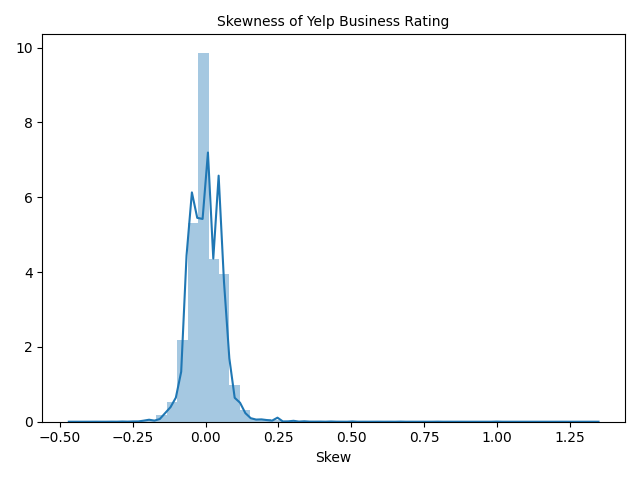

In [28]:
plt.figure()

ax = sb.distplot(skewness)

ax.set_xlabel('Skew', size=10)

plt.title("Skewness of Yelp Business Rating", size=10)

plt.tight_layout()

%matplot plt

So, do Yelp (written) Reviews skew negative? Does this analysis actually prove anything? Expound on implications / interpretations of this graph. 

In [29]:
skewness.describe()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

            skewness
count  209393.000000
mean        0.001235
std         0.055235
min        -0.454545
25%        -0.033898
50%         0.000000
75%         0.035714
max         1.333333

**Explanation:**

**Defintion:** In probability theory and statistics, skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. The skewness value can be positive, zero, negative, or undefined.

From the resultant graph above, we can observe that the it is slightly right-skewed. A histogram is right skewed if the peak of the histogram veers to the left. Therefore, the histogram’s tail has a positive skew to the right. This means, that the ratings which are attributed for positive reviews are having a higher weight than the ones which are attributed for negative reviews, by a thing margin.

The skewness description shows that the median is at 0, while the skewness is more co-related towards the positive side of the tail.

----
***Additional Exercise:***

## Sentiment Analysis

We fetch the column **text** because we need only that column for extracting sentiments from the 'tip' dataset

In [88]:
tip = spark.read.json('s3://yelp-dataset-tm/yelp_academic_dataset_tip.json')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [89]:
tip.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- business_id: string (nullable = true)
 |-- compliment_count: long (nullable = true)
 |-- date: string (nullable = true)
 |-- text: string (nullable = true)
 |-- user_id: string (nullable = true)

In [90]:
tip.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+----------------+-------------------+--------------------+--------------------+
|         business_id|compliment_count|               date|                text|             user_id|
+--------------------+----------------+-------------------+--------------------+--------------------+
|UYX5zL_Xj9WEc_Wp-...|               0|2013-11-26 18:20:08|Here for a quick mtg|hf27xTME3EiCp6NL6...|
|Ch3HkwQYv1YKw_FO0...|               0|2014-06-15 22:26:45|Cucumber strawber...|uEvusDwoSymbJJ0au...|
|rDoT-MgxGRiYqCmi0...|               0|2016-07-18 22:03:42|Very nice good se...|AY-laIws3S7YXNl_f...|
|OHXnDV01gLokiX1EL...|               0|2014-06-06 01:10:34|It's a small plac...|Ue_7yUlkEbX4AhnYd...|
|GMrwDXRlAZU2zj5nH...|               0|2011-04-08 18:12:01|8 sandwiches, $24...|LltbT_fUMqZ-ZJP-v...|
+--------------------+----------------+-------------------+--------------------+--------------------+
only showing top 5 rows

Installing and importing word cloud package

In [93]:
sc.install_pypi_package("wordcloud")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached wordcloud-1.6.0-cp36-cp36m-manylinux1_x86_64.whl (361 kB)
  Using cached Pillow-7.1.2-cp36-cp36m-manylinux1_x86_64.whl (2.1 MB)

In [96]:
from wordcloud import WordCloud

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

### Text Pre-processing

The stars are relabelled so that any reviews with 4 stars or above will be positive, anything else is deemed to be negative. This benchmark is based on a general consensus about Yelp reviews where people tend to overrate restaurants/businesses unless they feel strongly negatively about the place. We saw that in our skew analysis above.

In [105]:
from pyspark.sql.types import IntegerType, StringType, DoubleType
from pyspark.sql.functions import udf, col

import string
import re

# remove punctuation
def remove_punct(text):
    regex = re.compile('[' + re.escape(string.punctuation) + '0-9\\r\\t\\n]')
    nopunct = regex.sub(" ", text)
    return nopunct

# binarize rating
def convert_rating(rating):
    rating = int(rating)
    if rating >=4: return 1
    else: return 0

# udf
punct_remover = udf(lambda x: remove_punct(x))
rating_convert = udf(lambda x: convert_rating(x))

# apply to review raw data
review = df_rev.select('review_id', punct_remover('text'), rating_convert('stars'))

review = review.withColumnRenamed('<lambda>(text)', 'text')\
                     .withColumn('label', review["<lambda>(stars)"].cast(IntegerType()))\
                     .drop('<lambda>(stars)')\
                     .limit(1000000)

review.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----------------------------------+-----+
|           review_id|                               text|label|
+--------------------+-----------------------------------+-----+
|wNu8mv1l2Ls_2xu6_...|               Great service and...|    1|
|lm8EslRY-LFYGVPP2...|               Trying to be too ...|    0|
|Qs1kfCrm8LU068CYq...|               In my initial rev...|    1|
|lD0OOhfrQvzO1upra...|               Great prices  but...|    0|
|9_7320FMHugzvF6Ga...|虽然给了四星 是因为在店里吃还行 ...|    1|
+--------------------+-----------------------------------+-----+
only showing top 5 rows

### Tokenize

Tokenizing the approach where we split the entire sentences into words and the order of the words will not hold any importance. Stop words such as prepositions or articles ("a", "the") are also removed so that we only keep the more meaningful words in the corpus.

In [106]:
from pyspark.ml.feature import *

# tokenize
tok = Tokenizer(inputCol="text", outputCol="words")
review_tokenized = tok.transform(review)

# remove stop words
stopword_rm = StopWordsRemover(inputCol='words', outputCol='words_nsw')
review_tokenized = stopword_rm.transform(review_tokenized)

review_tokenized.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+-----+--------------------+--------------------+
|           review_id|                text|label|               words|           words_nsw|
+--------------------+--------------------+-----+--------------------+--------------------+
|xQY8N_XvtGbearJ5X...|As someone who ha...|    0|[as, someone, who...|[someone, worked,...|
|UmFMZ8PyXZTY2Qcwz...|I am actually hor...|    0|[i, am, actually,...|[actually, horrif...|
|LG2ZaYiOgpr2DK_90...|I love Deagan s  ...|    1|[i, love, deagan,...|[love, deagan, , ...|
|i6g_oA9Yf9Y31qt0w...|Dismal  lukewarm ...|    0|[dismal, , lukewa...|[dismal, , lukewa...|
|6TdNDKywdbjoTkize...|Oh happy day  fin...|    1|[oh, happy, day, ...|[oh, happy, day, ...|
+--------------------+--------------------+-----+--------------------+--------------------+
only showing top 5 rows

### Unigrams & trigrams

*Frequency > 20*

plit the model into trigrams (e.g. every three words in a single review will be split together. We will then pick out the trigrams that appear more than 20 times in the corpus, so that we can eliminate any random phrases that only appear once or twice.

In [107]:
# add ngram column
n = 3
ngram = NGram(inputCol = 'words', outputCol = 'ngram', n = n)
add_ngram = ngram.transform(review_tokenized)
add_ngram.show(4)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+-----+--------------------+--------------------+--------------------+
|           review_id|                text|label|               words|           words_nsw|               ngram|
+--------------------+--------------------+-----+--------------------+--------------------+--------------------+
|xQY8N_XvtGbearJ5X...|As someone who ha...|    0|[as, someone, who...|[someone, worked,...|[as someone who, ...|
|UmFMZ8PyXZTY2Qcwz...|I am actually hor...|    0|[i, am, actually,...|[actually, horrif...|[i am actually, a...|
|LG2ZaYiOgpr2DK_90...|I love Deagan s  ...|    1|[i, love, deagan,...|[love, deagan, , ...|[i love deagan, l...|
|i6g_oA9Yf9Y31qt0w...|Dismal  lukewarm ...|    0|[dismal, , lukewa...|[dismal, , lukewa...|[dismal  lukewarm...|
+--------------------+--------------------+-----+--------------------+--------------------+--------------------+
only showing top 4 rows

In [34]:
# generate the top frequent ngram
ngrams = add_ngram.rdd.flatMap(lambda x: x[-1]).filter(lambda x: len(x.split())==n)
ngram_tally = ngrams.map(lambda x: (x, 1))\
                      .reduceByKey(lambda x,y: x+y)\
                      .sortBy(lambda x: x[1], ascending=False)\
                      .filter(lambda x: x[1]>=20)
ngram_list = ngram_tally.map(lambda x: x[0]).collect()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

### Plot the wordcloud

In [99]:
tip = tip.select('text').toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

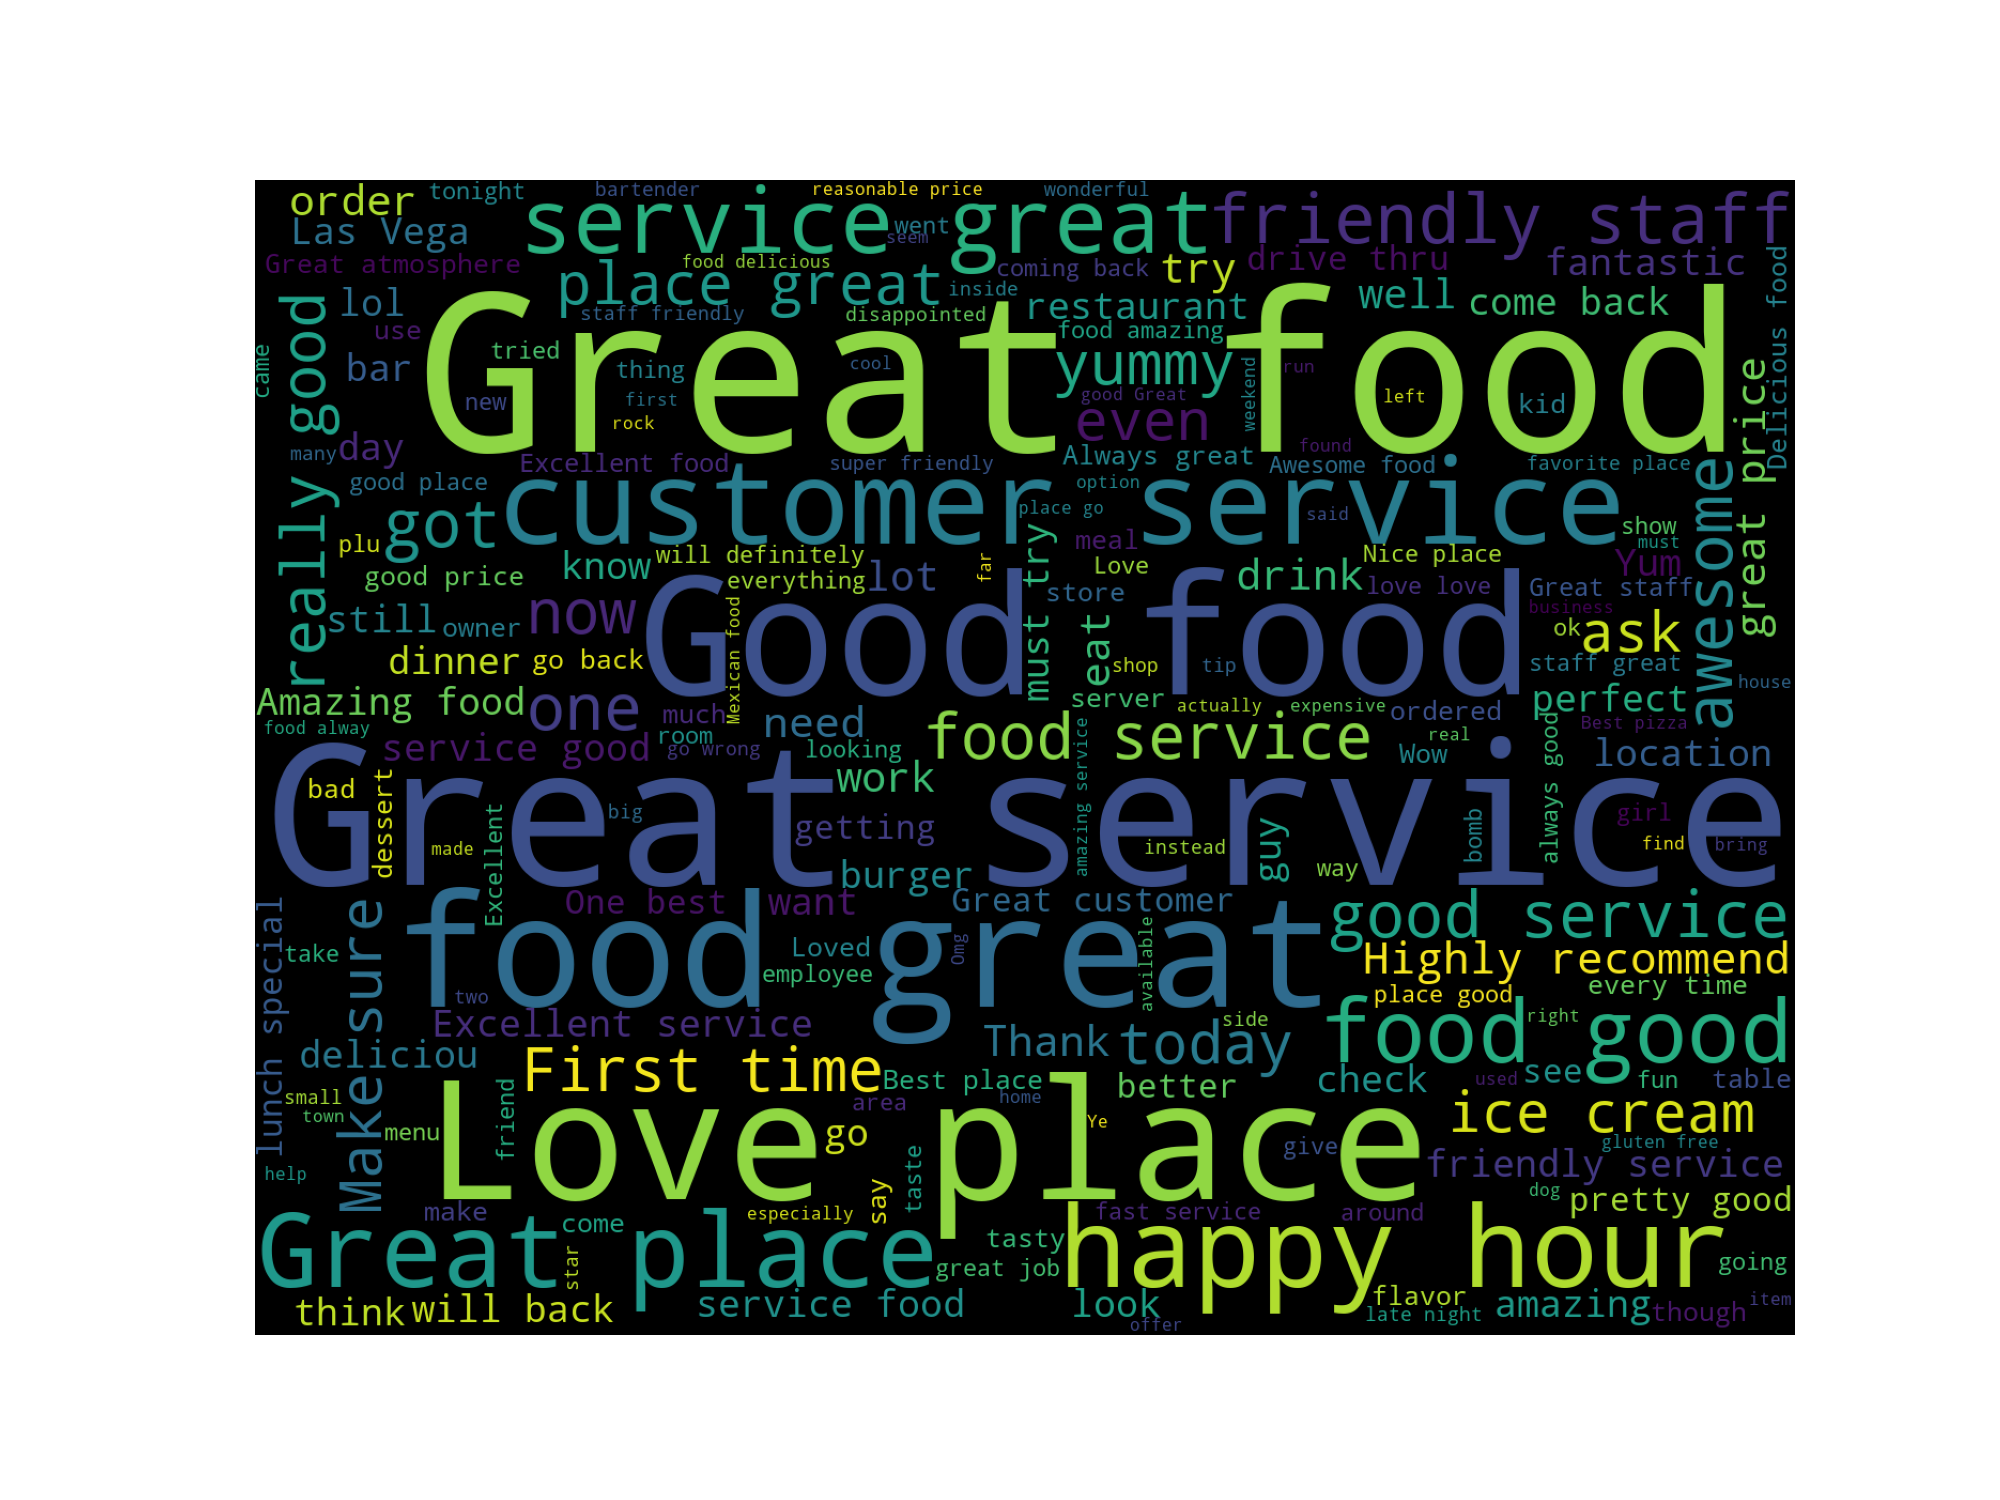

In [101]:
cloud = WordCloud(width=1440, height= 1080,max_words= 200).generate(' '.join(tip['text'].astype(str)))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off');

%matplot plt

# 4. Should the Elite be Trusted? 

For the final portion - you have a choice:

* Try and analyze some interesting dimension to this data. The **ONLY** requirement is that you must use the **Users** dataset and join on either the **business* or **reviews** dataset
* Or, you may try and answer the question posed: how accurate or close are the ratings of an "elite" user (check Users table schema) vs the actual business rating.

Feel free to use any and all methodologies at your disposal - only requirement is you must render one visualization in your analysis

In [30]:
df_user = spark.read.json('s3://9760-spark-data/yelp_academic_dataset_user.json')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [31]:
df_user.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- average_stars: double (nullable = true)
 |-- compliment_cool: long (nullable = true)
 |-- compliment_cute: long (nullable = true)
 |-- compliment_funny: long (nullable = true)
 |-- compliment_hot: long (nullable = true)
 |-- compliment_list: long (nullable = true)
 |-- compliment_more: long (nullable = true)
 |-- compliment_note: long (nullable = true)
 |-- compliment_photos: long (nullable = true)
 |-- compliment_plain: long (nullable = true)
 |-- compliment_profile: long (nullable = true)
 |-- compliment_writer: long (nullable = true)
 |-- cool: long (nullable = true)
 |-- elite: string (nullable = true)
 |-- fans: long (nullable = true)
 |-- friends: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- name: string (nullable = true)
 |-- review_count: long (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)
 |-- yelping_since: string (nullable = true)

In [32]:
user = df_user["user_id", "average_stars", "elite", "fans","name","review_count", "yelping_since"]

user.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-------------+--------------------+----+--------+------------+-------------------+
|             user_id|average_stars|               elite|fans|    name|review_count|      yelping_since|
+--------------------+-------------+--------------------+----+--------+------------+-------------------+
|ntlvfPzc8eglqvk92...|         3.57|                    |  14|  Rafael|         553|2007-07-06 03:27:11|
|FOBRPlBHa3WPHFB5q...|         3.84|2008,2009,2010,20...|  27|Michelle|         564|2008-04-28 01:29:25|
|zZUnPeh2hEp0WydbA...|         3.44|                2010|   5|  Martin|          60|2008-08-28 23:40:05|
|QaELAmRcDc5TfJEyl...|         3.08|                2009|   6|    John|         206|2008-09-20 00:08:14|
|xvu8G900tezTzbbfq...|         4.37|2009,2010,2011,20...|  78|    Anne|         485|2008-08-09 00:30:27|
+--------------------+-------------+--------------------+----+--------+------------+-------------------+
only showing top 5 rows

In [33]:
# This to explode the elite column into multiple rows withe ach row representing one record
# Basically, making the database relational

from pyspark.sql.functions import split, explode

user_filter = user.select(user.user_id, explode(split(user.elite, ',')).alias('elite'))

user_filter.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|             user_id|elite|
+--------------------+-----+
|ntlvfPzc8eglqvk92...|     |
|FOBRPlBHa3WPHFB5q...| 2008|
|FOBRPlBHa3WPHFB5q...| 2009|
|FOBRPlBHa3WPHFB5q...| 2010|
|FOBRPlBHa3WPHFB5q...| 2011|
+--------------------+-----+
only showing top 5 rows

### Joining the datasets - user, business and review

Step1: First joining: business and review

In [34]:
business = df.select('business_id', 'city', 'state', 'stars').withColumnRenamed('stars', 'business_stars')
review = df_rev.select('business_id', 'date', 'review_id', 'user_id', 'stars').withColumnRenamed('stars', 'review_stars')

join_b_r = business.join(review, on=['business_id'], how='inner')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [35]:
join_b_r.select('business_id', 'city', 'state', 'date', 'business_stars', 'review_stars').show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+---------+-----+-------------------+--------------+------------+
|         business_id|     city|state|               date|business_stars|review_stars|
+--------------------+---------+-----+-------------------+--------------+------------+
|--9e1ONYQuAa-CB_R...|Las Vegas|   NV|2018-05-16 18:19:28|           4.0|         2.0|
|--9e1ONYQuAa-CB_R...|Las Vegas|   NV|2013-09-14 13:49:23|           4.0|         4.0|
|--9e1ONYQuAa-CB_R...|Las Vegas|   NV|2015-09-20 03:34:44|           4.0|         5.0|
|--9e1ONYQuAa-CB_R...|Las Vegas|   NV|2010-10-24 20:59:57|           4.0|         4.0|
|--9e1ONYQuAa-CB_R...|Las Vegas|   NV|2018-08-19 18:58:10|           4.0|         5.0|
+--------------------+---------+-----+-------------------+--------------+------------+
only showing top 5 rows

Step2: Second joining: user with step 1 results.

In [36]:
join_b_r_u = join_b_r.join(user, on=['user_id'], how='inner')

join_b_r_u.select('business_id', 'user_id', 'city', 'state', 'date', 'business_stars', 'review_stars').show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+----------+-----+-------------------+--------------+------------+
|         business_id|             user_id|      city|state|               date|business_stars|review_stars|
+--------------------+--------------------+----------+-----+-------------------+--------------+------------+
|pmrHuQiy25xKB86tb...|-0Ji0nOyFe-4yo8BK...|  Matthews|   NC|2014-03-21 17:09:59|           4.0|         4.0|
|QhwaGi1niDeVEHMRt...|-0XPr1ilUAfp-yIXZ...|Pittsburgh|   PA|2012-07-06 03:43:34|           2.5|         2.0|
|L772e6l2Yd0DJEyCB...|-1KKYzibGPyUX-Mwk...|   Madison|   WI|2014-09-19 01:12:10|           3.0|         4.0|
|sAS4fHDiK8A9a1wEA...|-1zQA2f_syMAdA04P...| Las Vegas|   NV|2014-08-28 01:31:40|           3.5|         1.0|
|DyYS-JKXlW2PCr_Gt...|-1zQA2f_syMAdA04P...| Las Vegas|   NV|2017-05-01 16:05:57|           3.5|         5.0|
+--------------------+--------------------+----------+-----+-------------------+--------------+------------+
only showing top 5 

Cleaning the data a bit to avoid ambiguous column names and also extracting the 'year' data from the resultant set above.

In [37]:
from pyspark.sql.functions import to_date, year

final = join_b_r_u.select('user_id', 'business_id', 'review_id', 'name', 'city', 'state', 'business_stars',
                          'review_stars', 'average_stars', 'elite', 'fans', 'review_count',
                         year(to_date(join_b_r_u.date, 'yyyy-MM-dd HH:mm:ss')).alias('review_year'),
                          year(to_date(join_b_r_u.yelping_since, 'yyyy-MM-dd HH:mm:ss')).alias('yelping_since'))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [38]:
final.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- user_id: string (nullable = true)
 |-- business_id: string (nullable = true)
 |-- review_id: string (nullable = true)
 |-- name: string (nullable = true)
 |-- city: string (nullable = true)
 |-- state: string (nullable = true)
 |-- business_stars: double (nullable = true)
 |-- review_stars: double (nullable = true)
 |-- average_stars: double (nullable = true)
 |-- elite: string (nullable = true)
 |-- fans: long (nullable = true)
 |-- review_count: long (nullable = true)
 |-- review_year: integer (nullable = true)
 |-- yelping_since: integer (nullable = true)

**NOTE:** This is to display all the columns from the final join table.
We set the max colum limit to None for the console.

In [39]:
pd.options.display.max_columns = None

final.limit(5).toPandas().head()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

                  user_id             business_id               review_id  \
0  -0Ji0nOyFe-4yo8BK4aRLA  pmrHuQiy25xKB86tbOLBlA  a0r23pA6D4HDLb9P5gmQkA   
1  -0XPr1ilUAfp-yIXZBw7jQ  QhwaGi1niDeVEHMRtQtvgQ  DfAjJ3KCimOdqplv426x-A   
2  -1KKYzibGPyUX-MwkBTlrg  L772e6l2Yd0DJEyCBxBNng  TbU3S2kWmfajlVov3I9EKw   
3  -1zQA2f_syMAdA04PUWNNw  aNe8ofTYrealxqv7VtFTuw  08j8zUlyJylKcJa_rIeB-w   
4  -1zQA2f_syMAdA04PUWNNw  sAS4fHDiK8A9a1wEAj4S3w  AF7_icUaLQVgj7d29xdYmw   

            name        city state  business_stars  review_stars  \
0           cubs    Matthews    NC             4.0           4.0   
1  Fairmount Jil  Pittsburgh    PA             2.5           2.0   
2         Nickie     Madison    WI             3.0           4.0   
3           Zach   Las Vegas    NV             3.5           5.0   
4           Zach   Las Vegas    NV             3.5           1.0   

   average_stars                     elite  fans  review_count  review_year  \
0           3.12                               0 

### Overview of the final dataset

Display the number of rows and columns in our dataset.

In [40]:
print(("Columns:", len(final.columns), "Rows:", (final.count())))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

('Columns:', 14, 'Rows:', 8021122)

Filtering out elite and non-elite users as seen below for our analysis:

In [41]:
non_elite = final.filter(final.elite == '')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [42]:
elite = final.filter(final.elite != '')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Validating the filter by checking the total sum of columns for elite and non-elite dataframe is same as that of the final

We can see here that it does match: 

| User Category | Count |
|-------------|------------|
| Elite     | 1756327         |
| Non-Elite     | 6264795          |
| Total     | 8021122          |


In [43]:
print(("Columns:", len(elite.columns), "Rows:", (elite.count())))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

('Columns:', 14, 'Rows:', 1756327)

In [44]:
print(("Columns:", len(non_elite.columns), "Rows:", (non_elite.count())))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

('Columns:', 14, 'Rows:', 6264795)

**Next up is calculation for star ratings for elite and non-elite users**

In [45]:
from pyspark.sql.functions import mean

elite_new = elite.groupBy('review_year').agg(mean('review_stars'))
elite_new.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+------------------+
|review_year| avg(review_stars)|
+-----------+------------------+
|       2007| 3.803283840050279|
|       2018|3.9732565903258763|
|       2015| 3.809813645927262|
|       2006|3.7878609310548024|
|       2013|3.7422430775965854|
+-----------+------------------+
only showing top 5 rows

In [46]:
elite_new = elite_new.withColumnRenamed('avg(review_stars)', 'elite_stars')

elite_new.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- review_year: integer (nullable = true)
 |-- elite_stars: double (nullable = true)

In [47]:
from pyspark.sql.functions import mean

non_elite_new = non_elite.groupBy('review_year').agg(mean('review_stars'))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [48]:
non_elite_new = non_elite_new.withColumnRenamed('avg(review_stars)', 'non_elite_stars')

non_elite_new.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- review_year: integer (nullable = true)
 |-- non_elite_stars: double (nullable = true)

In [49]:
result = elite_new.join(non_elite_new, on=['review_year'], how='outer')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [50]:
result = result.sort('review_year')

result.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+------------------+------------------+
|review_year|       elite_stars|   non_elite_stars|
+-----------+------------------+------------------+
|       2004|             4.375|               5.0|
|       2005| 4.003048780487805| 4.091324200913242|
|       2006|3.7878609310548024| 3.867970660146699|
|       2007| 3.803283840050279|3.8121652184263777|
|       2008|3.7172695207137423|3.7061044233919795|
|       2009| 3.699430748159562|3.6622742078768136|
|       2010|3.6994040001462576|3.6688792321283605|
|       2011| 3.705662051373924|3.6237803825065837|
|       2012|3.7259065588778375| 3.565665714776935|
|       2013|3.7422430775965854|3.5861829422899913|
|       2014|3.7664894436739096| 3.631145620547514|
|       2015| 3.809813645927262|3.6504015028682564|
|       2016|3.8624557934365136|3.6829871302521675|
|       2017|3.9185660767668615|3.6980014395760907|
|       2018|3.9732565903258763| 3.698067759333927|
|       2019| 3.979184781526494| 3.674338631044418|
+-----------

**Plot the graph now**

In [51]:
graph = result.toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

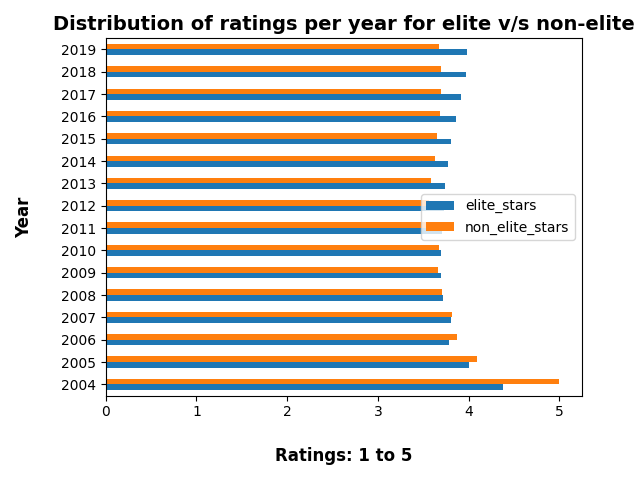

In [52]:
ax = graph.plot(x="review_year", y=["elite_stars", "non_elite_stars"], kind="barh")
ax.set_xlabel("Ratings: 1 to 5", labelpad=20, weight='bold', size=12)
ax.set_ylabel("Year", labelpad=20, weight='bold', size=12)
ax.set_title("Distribution of ratings per year for elite v/s non-elite", weight='bold', size=14)
plt.tight_layout()

%matplot plt

**Now, we saw the raw distribution of the star ratings by Elite users against the Non-elite users.**

We see Elite users tend to give more generous rating and thus probably skew the average rating in their favour. So, it might not be right to trust them blindly and make a call. Though, you would feel that based on years of experience and having tried many options they have the knowledge to compare the choices. I would still want to see a trend by deducting the average rating score and make a call.

Also, to be noted is that earlier when Yelp was new back in 2004-2008, it seems like the the non-elite users were having a higher average raw ratings but it seems to have changed the trend since and lately in recent years the gap between elite and non-elite ratings have widened.

Below we try another way and see if that's giving any different direction to our investigation on this matter:

In [53]:
pd.options.display.max_columns = None

final.limit(5).toPandas().head()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

                  user_id             business_id               review_id  \
0  -0Ji0nOyFe-4yo8BK4aRLA  pmrHuQiy25xKB86tbOLBlA  a0r23pA6D4HDLb9P5gmQkA   
1  -0XPr1ilUAfp-yIXZBw7jQ  QhwaGi1niDeVEHMRtQtvgQ  DfAjJ3KCimOdqplv426x-A   
2  -1KKYzibGPyUX-MwkBTlrg  L772e6l2Yd0DJEyCBxBNng  TbU3S2kWmfajlVov3I9EKw   
3  -1zQA2f_syMAdA04PUWNNw  fuC3sui68QWg-rqldhJ01A  QCQJC9kbCkhzTRosSUnazw   
4  -1zQA2f_syMAdA04PUWNNw  aNe8ofTYrealxqv7VtFTuw  08j8zUlyJylKcJa_rIeB-w   

            name        city state  business_stars  review_stars  \
0           cubs    Matthews    NC             4.0           4.0   
1  Fairmount Jil  Pittsburgh    PA             2.5           2.0   
2         Nickie     Madison    WI             3.0           4.0   
3           Zach   Las Vegas    NV             3.0           1.0   
4           Zach   Las Vegas    NV             3.5           5.0   

   average_stars                     elite  fans  review_count  review_year  \
0           3.12                               0 

In [54]:
from pyspark.sql.functions import col

elite = elite.withColumn("Weighted Ratings", (col("review_stars") - col("average_stars")))
non_elite = non_elite.withColumn("Weighted Ratings", (col("review_stars") - col("average_stars")))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [55]:
from pyspark.sql.functions import mean

elite_new_avg = elite.groupBy('review_year').agg(mean('Weighted Ratings'))
elite_new_avg.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+---------------------+
|review_year|avg(Weighted Ratings)|
+-----------+---------------------+
|       2007| 0.029722680493361634|
|       2018|  0.02836530958644044|
|       2015| -0.03219073382283476|
|       2006|  0.01814672952268709|
|       2013| -0.06036992448287183|
+-----------+---------------------+
only showing top 5 rows

In [56]:
elite_new_avg = elite_new_avg.withColumnRenamed('avg(Weighted Ratings)', 'avg_elite_stars')

elite_new_avg.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- review_year: integer (nullable = true)
 |-- avg_elite_stars: double (nullable = true)

In [57]:
from pyspark.sql.functions import mean

non_elite_new_avg = non_elite.groupBy('review_year').agg(mean('Weighted Ratings'))
non_elite_new_avg.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+---------------------+
|review_year|avg(Weighted Ratings)|
+-----------+---------------------+
|       2007|  0.05784549458397808|
|       2018| -0.00110440869545...|
|       2015| -0.03338073767286093|
|       2006|  0.11333129584352072|
|       2013| -0.06707215343024028|
+-----------+---------------------+
only showing top 5 rows

In [58]:
non_elite_new_avg = non_elite_new_avg.withColumnRenamed('avg(Weighted Ratings)', 'avg_non_elite_stars')

non_elite_new_avg.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- review_year: integer (nullable = true)
 |-- avg_non_elite_stars: double (nullable = true)

In [59]:
result_new_avg = elite_new_avg.join(non_elite_new_avg, on=['review_year'], how='outer')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [60]:
result_new_avg = result_new_avg.sort('review_year')

result_new_avg.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+--------------------+--------------------+
|review_year|     avg_elite_stars| avg_non_elite_stars|
+-----------+--------------------+--------------------+
|       2004|  0.5812499999999999|  0.7025000000000001|
|       2005|   0.258018292682927| 0.16872146118721462|
|       2006|0.018146729522687092| 0.11333129584352075|
|       2007| 0.02972268049336161|0.057845494583978065|
|       2008|-0.03407185835811...| 0.02550965168459292|
|       2009|-0.04759544598527...|-0.01021450251702...|
|       2010|-0.05248040757127009|-0.01897645766677809|
|       2011|-0.06451454115800345|-0.05071164141087078|
|       2012|-0.05945482334321...|-0.07620506304696964|
|       2013| -0.0603699244828718| -0.0670721534302403|
|       2014|-0.05028471259053774|-0.04623058844202...|
|       2015|-0.03219073382283...|-0.03338073767286095|
|       2016|-0.00839187930182...|-0.01360772727992775|
|       2017|0.007622531397553774|-0.00978133758059...|
|       2018|0.028365309586440422|-0.00110440869

In [61]:
graph_new = result_new_avg.toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

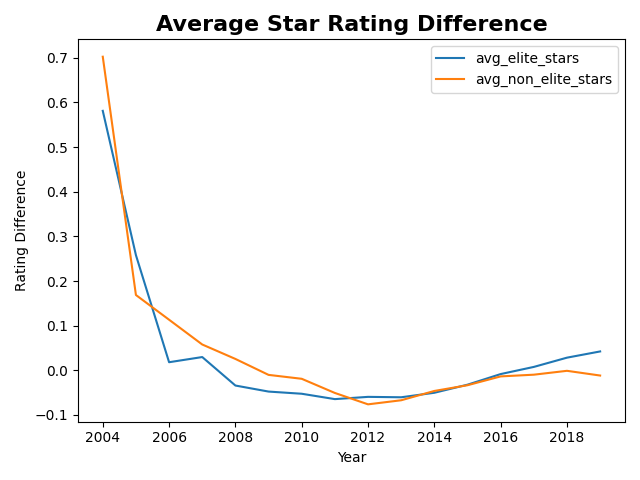

In [62]:
plt.figure()

ax = graph_new.set_index('review_year').plot()
ax.set_ylabel('Rating Difference')
ax.set_xlabel('Year')
plt.title("Average Star Rating Difference", weight='bold', size=16)
plt.tight_layout()

%matplot plt

**On further investigation we found that:**

If we include overall average in our calculation and since it is a derivative of all ratings divided by total reviewers, it can help us see how the trend has been, and it appears that our conclusion from raw average of users - elite and non-elite is no different for recent years. 

However, in the past the non-elite seems to have more positive divide from the average ratings of the categories, business, etc., that is, the feedback is so varied that it is in a way inconclusive. On the other hand, the ratings from elite in the past was negatively co-related to the overall average but has picked up since.

----
That being said, I wouldn't conclude clearly saying the elite users can be trusted over the non-elite ones. May be we can dig deeper into categories, by states/cities and other features to see what could be the possible drivers for such digression.